In [1]:
from utils import *
import pandas as pd
import numpy as np
from trader import KalmanFilter

In [2]:
cnt_train = load_product('train', 'COCONUTS')
pnc_train = load_product('train', 'PINA_COLADAS')
cnt_val = load_product('val', 'COCONUTS')
pnc_val = load_product('val', 'PINA_COLADAS')

In [3]:
val = pd.concat((cnt_val['mid_price'], pnc_val['mid_price']), axis=1)
val.columns = ['cnt', 'pnc']
val.head()

,cnt,pnc
timestamp,,
0,8004.5,15014.5
100,8004.0,15012.5
200,8004.0,15016.5
300,8005.0,15015.5
400,8003.5,15013.5


In [4]:
X = np.hstack((cnt_train['mid_price'].to_numpy().reshape(-1, 1), np.ones((cnt_train['mid_price'].shape[0], 1))))
Y = pnc_train['mid_price'].to_numpy().reshape(-1, 1)
params = np.linalg.inv(X.T @ X) @ X.T @ Y

In [5]:
Q = np.asarray([[0.00021424, 0],
                [0, 0]])

In [6]:
km = KalmanFilter(params, Q, 1.72464704)

In [7]:
gamma = []
mu = []

for row in val.to_numpy():
    out = km(row[1], row[0])
    gamma.append(out[0])
    mu.append(out[1])

val['gamma'] = gamma
val['mu'] = mu
val.head()

,cnt,pnc,gamma,mu
timestamp,,,,
0,8004.5,15014.5,1.930621,-439.161182
100,8004.0,15012.5,1.930492,-439.161182
200,8004.0,15016.5,1.930992,-439.161182
300,8005.0,15015.5,1.930626,-439.161182
400,8003.5,15013.5,1.930738,-439.161182


In [8]:
val['spread'] = val['pnc'] - val['gamma'] * val['cnt'] - val['mu']

<AxesSubplot:xlabel='timestamp'>

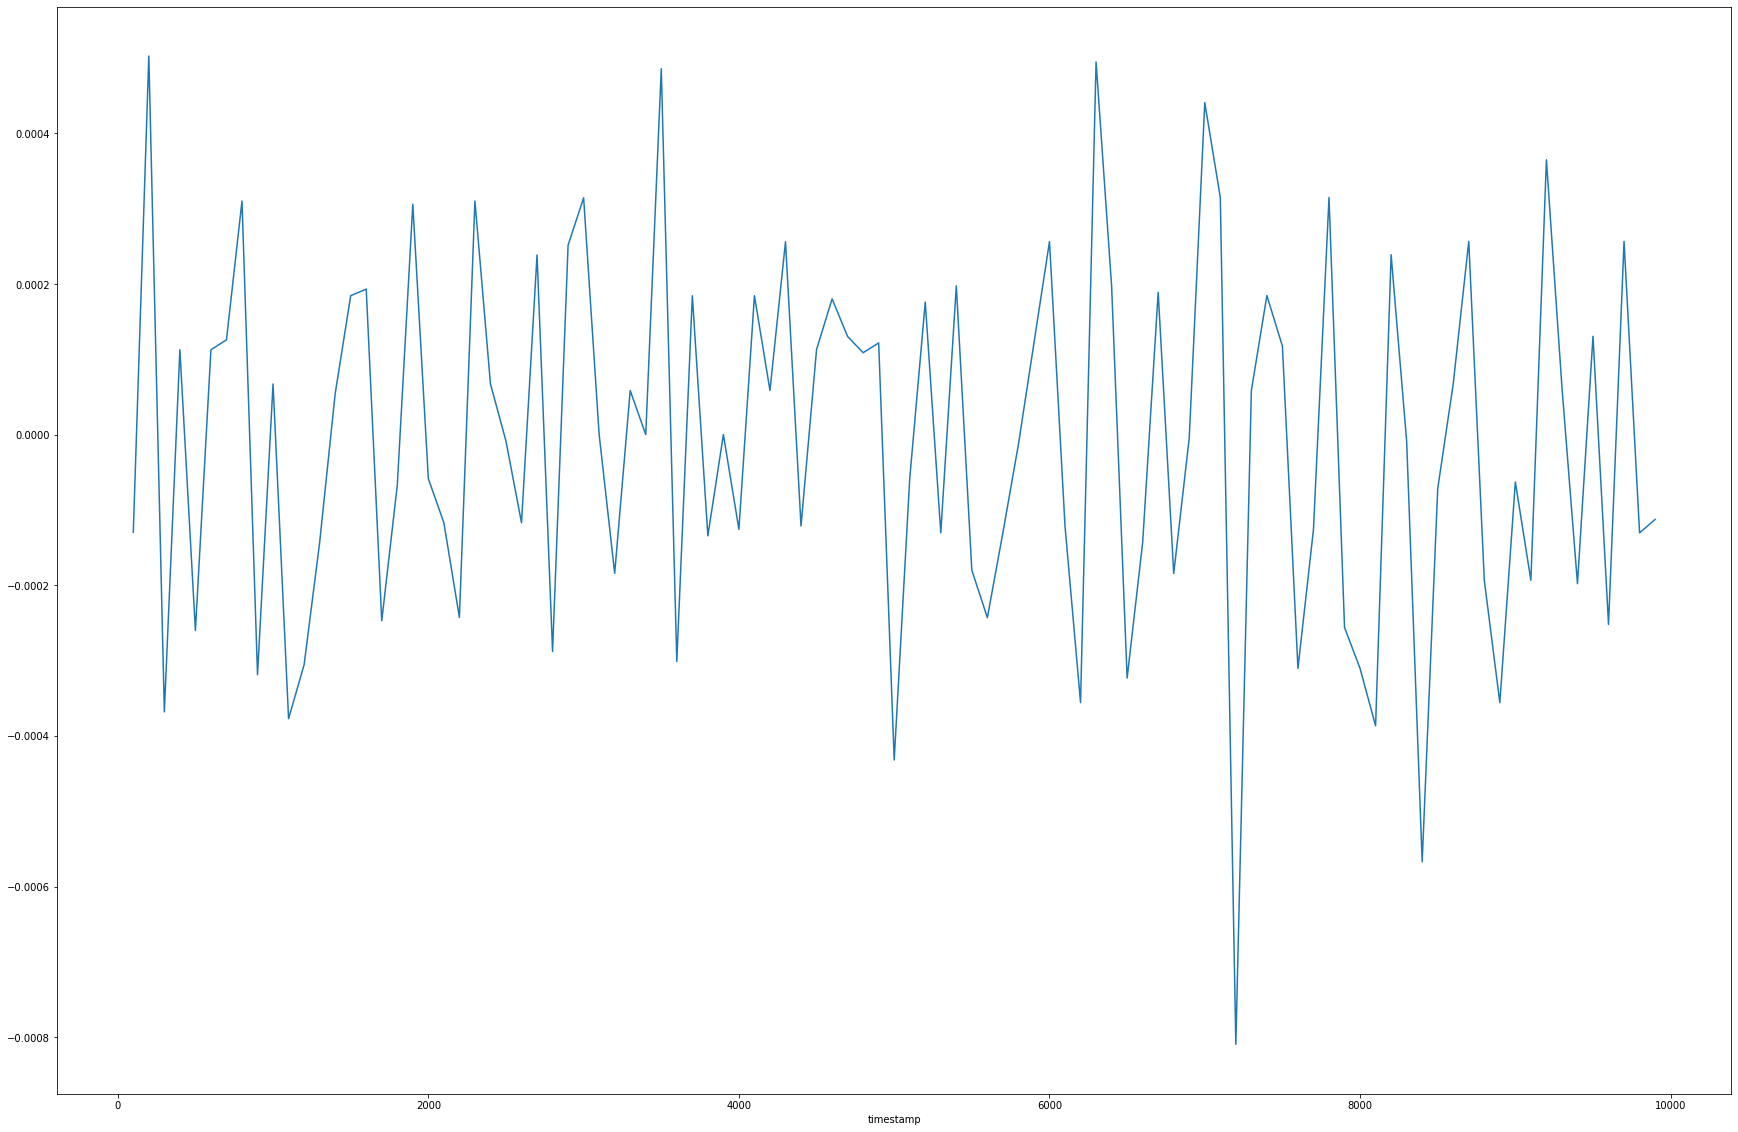

In [11]:
val['spread'][1:100].plot(figsize=(30, 20))